# Цель проекта: Используя данные интернет-магазина приоритезировать гипотезы, произвести оценку результатов A/B-тестирования различными методами

## Часть  . Приоритизация гипотез.

# Задача 1

### Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

In [2]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [3]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
pd.set_option('display.max_colwidth', 0)

display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
data['ICE'] = (data['Impact'] * data['Confidence'])/data['Efforts']
pd.set_option('display.max_colwidth', 0)

display(data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


# Вывод
Наиболее перспективные гипотезы по ICE: 8, 0, 7, ,6, 2.

### Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

In [5]:
data['RICE'] = (data['Reach'] * data['Impact'] * data['Confidence'])/data['Efforts']
pd.set_option('display.max_colwidth', 0)

display(data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


# Вывод
И снова наиболее перспективные гипотезы: 0, 2, 6, 7, 8.

### Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Наиболее перспективные гипотезы по ICE: 8, 0, 7, ,6, 2. Не столь важно, какой метод применять, главное - точно оценивать его параметры. Точная оценка гипотезы зависит от метода. Потому смотрите на место гипотез среди остальных, а не на абсолютную оценку. 
И снова наиболее перспективные гипотезы: 0, 2, 6, 7, 8. Однако на первом месте уже гипотеза под номером 7. Так получилось, потому что ее параметр Reach равен 10, в то время как у други: потез он меньше. Кроме силы гипотез, учитывайте и то, как много пользователей она затронет.

## Часть . Анализ A/B-теста.

# Задача 2
# Проанализировать A/B-тест:

### Постройть график кумулятивной выручки по группам. Сделать выводы и предположения.

In [6]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [7]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

display(orders.head(5))
display(visitors.head(5))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
#проверим на наличие пропусков
display(orders.isna().sum())
display(visitors.isna().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [9]:
#проверим на наличие дубликатов
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

После предобработки можно заключить что наличие дубликатов и пропусков отсутствует.

In [10]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()
display(datesGroups)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [11]:
# Соберём агрегированные кумулятивные по дням данные о заказах:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# Соберём агрегированные кумулятивные по дням данные о посетителях:

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

display(ordersAggregated.head(5))
display(visitorsAggregated.head(5))

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


# Вывод
Код работает так, будто мы ежедневно считали результаты тестирования до выбранного дня включительно и сохраняли их в строках таблицы и аналогично получим агрегированные кумулятивные по дням данные о посетителях

In [12]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


# Вывод.
Собрали все кумулятивные данные, теперь можно перейти к следующиму этапу.

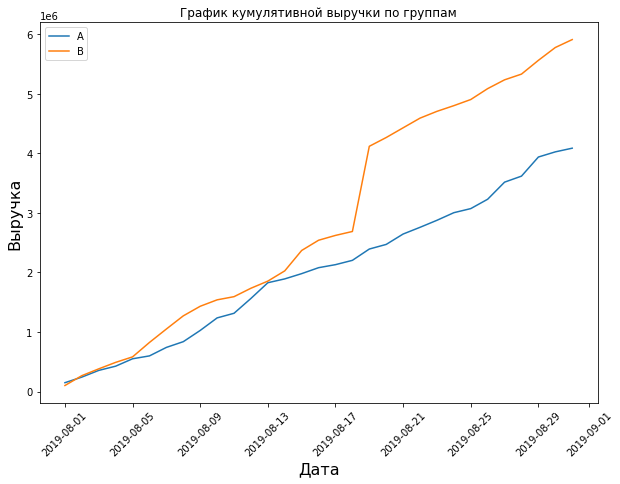

In [13]:

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,7))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xlabel('Дата', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Выручка', fontsize=16)
plt.title('График кумулятивной выручки по группам')
plt.show()

# Вывод
Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако графики выручки обеих групп в нескольких точках резко растут. Особенно резко возрасло в группе В. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Постройть график кумулятивного среднего чека по группам. Сделайть выводы и предположения.

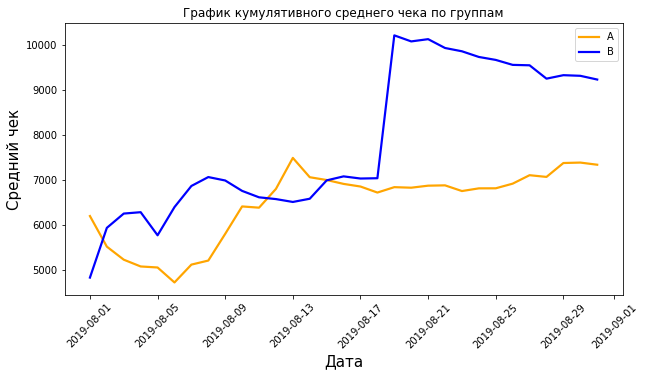

In [14]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(10,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', color='orange', linewidth = 2.2)
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B', color='blue', linewidth = 2.2)
plt.legend()
plt.xlabel('Дата', fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('Средний чек', fontsize=15)
plt.title('График кумулятивного среднего чека по группам')
plt.show()

# Вывод
Средний чек тоже становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Возможно, в группу B в начале второй половины теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### Постройть график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.

No handles with labels found to put in legend.


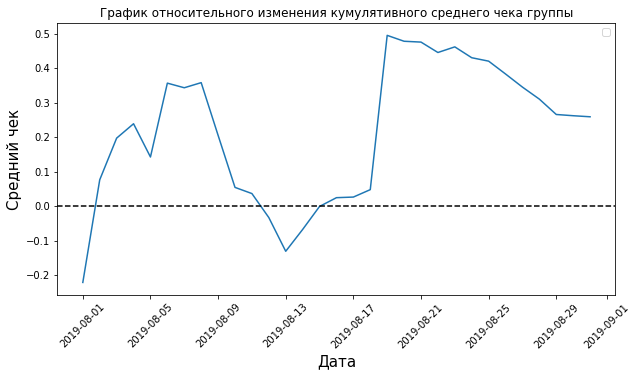

In [15]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.legend()
plt.xlabel('Дата', fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('Средний чек', fontsize=15)
plt.title('График относительного изменения кумулятивного среднего чека группы')
plt.show()

# Вывод
В нескольких точках график различия между сегментами резко «скачет». Вероятно где-то спрятались крупные заказы и выбросы.

### Постройть график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.

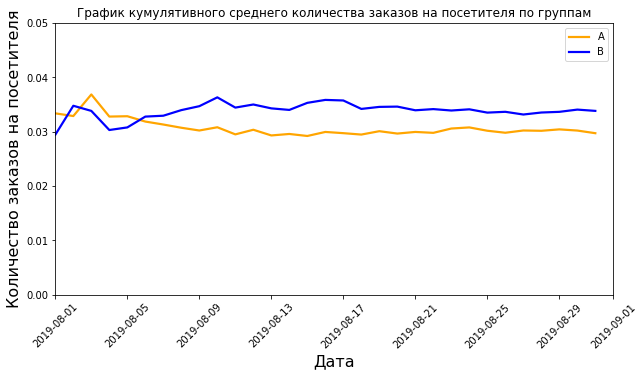

In [16]:

# Строим данные по группе А
cumulativeVisitorsA = cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'orders']]

# Строим данные по группе B
cumulativeVisitorsB = cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'orders']]

plt.figure(figsize=(10,5))
# сторим графики
plt.plot(cumulativeVisitorsA['date'], cumulativeVisitorsA['orders']/cumulativeVisitorsA['visitors'], label='A', color='orange', linewidth = 2.2)

plt.plot(cumulativeVisitorsB['date'], cumulativeVisitorsB['orders']/cumulativeVisitorsB['visitors'], label='B', color='blue', linewidth = 2.2)
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.xlabel('Дата', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Количество заказов на посетителя', fontsize=16)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.show()


# Вывод
Группы точно различаются, в начале оба резко скаканули, сложно назвать график симметричным. Группы очень сильно колебались, при том что группа A просела и не стабильна и скачет непрерывна, как и группа B, но в отличии от А, она вырвалась вперед  и зафиксировалась, но такая же нестабильная.

### Постройть график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.

No handles with labels found to put in legend.


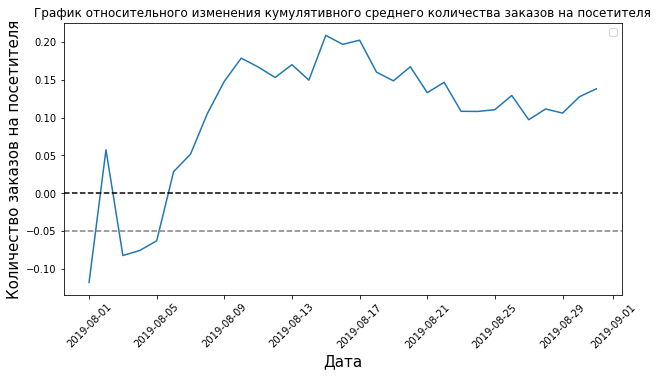

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeVisitors = cumulativeVisitorsA.merge(cumulativeVisitorsB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeVisitors['date'], (mergedCumulativeVisitors['ordersB']/mergedCumulativeVisitors['visitorsB'])/(mergedCumulativeVisitors['ordersA']/mergedCumulativeVisitors['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.05, color='grey', linestyle='--')

plt.legend()
plt.xlabel('Дата', fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('Количество заказов на посетителя', fontsize=15)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя')
plt.show()

# Вывод
В начале теста группа B значительно проигрывала группе A, но затем вырвалась вперёд за небольшой период времени и стала ледировать, по среднему количеству заказов на посетителя: становаиться все лучше и лучше, затем зафиксировалось(с небольшими скачками) около прироста относительно группый А

### Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.

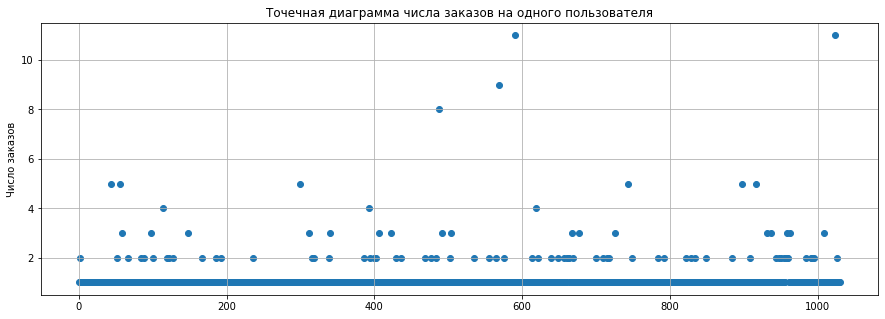

In [18]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['user_id', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.scatter(x_values, ordersByUsers['orders']) 

plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.ylabel('Число заказов')
plt.grid()
plt.show()

# Вывод
Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже значительна. Их точная доля не ясна — пока непонятно, считать их аномалиями или нет. 

### Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберать границу для определения аномальных пользователей.

In [19]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


# Вывод
 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.
 Разумно выбрать 2 заказов на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней

### Построить точечный график стоимостей заказов. Сделать выводы и предположения.

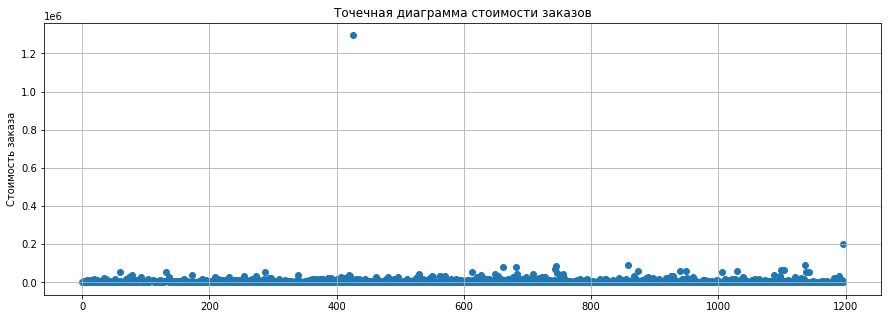

In [20]:
x_values = pd.Series(range(0,len(orders)))

plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue']) 

plt.title('Точечная диаграмма стоимости заказов')
plt.ylabel('Стоимость заказа')
plt.grid()
plt.show()

In [21]:
orders['revenue'].sort_values(ascending=False)

425     1294500
1196    202740 
858     93940  
1136    92550  
744     86620  
        ...    
933     60     
459     50     
756     50     
584     50     
1091    50     
Name: revenue, Length: 1197, dtype: int64

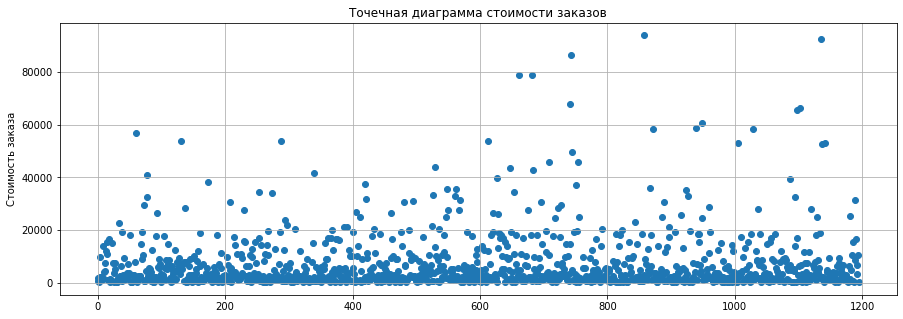

In [22]:
df_orders = orders[orders['revenue']<200000]
x_values = pd.Series(range(0,len(df_orders)))

plt.figure(figsize=(15,5))
plt.scatter(x_values, df_orders['revenue']) 

plt.title('Точечная диаграмма стоимости заказов')
plt.ylabel('Стоимость заказа')
plt.grid()
plt.show()

# Вывод
В данных явно есть заказы дороже 50 000 — например, около 100 000, 150 000 и 200 000 рублей, есть даже 1 300 000. Однако большинство всё-таки имеет меньшую выручку.По графику можно выбрать границу аномальных заказов между 45 000 и 80 000 рублей. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями. 

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера V2:</b>

Супер!
</div>

### Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.

In [23]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


# Вывод
Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. Принято отсеивать от 1% до 5% наблюдений с крайними значениями. Разумно будет выбратьпороговым 58 000 рублей на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.

In [24]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data_tbl = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data_tbl.head(5)) 

#Названия столбцов данных:

# ordersPerDateA — количество заказов в выбранную дату в группе A;
# revenuePerDateA — суммарная выручка в выбранную дату в группе A;
# ordersPerDateB — количество заказов в выбранную дату в группе B;
# revenuePerDateB — суммарная выручка в выбранную дату в группе B;
# ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
# revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
# ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
# revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
# visitorsPerDateA — количество пользователей в выбранную дату в группе A;
# visitorsPerDateB — количество пользователей в выбранную дату в группе B;
# visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
# visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Нулевая гипотеза: различий в среднем количестве заказов между группами нет. Альтернативная гипотеза: различия в среднем между группами есть.
Установим уровень alpha = 0.05. Применим статистический критерий Манна-Уитни к полученным выборкам:

In [25]:
#Посчитаем статистическую значимость различия в среднем количестве заказов между группами.
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'transactionId']. 
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

#Объявите переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. 
#А пользователям без заказов — нули. Возьмите код из урока в качестве примера. 
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_tbl['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_tbl['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.01679
0.138


# Вывод
Первое число — p-value = 0.01679 меньше 0.05(5%), это значит что мы можем опровергнуть нулевую гипотезу. Относительный проигрыш группы А равен 13.8%

### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.

Нулевая гипотеза: состоит в том, что различие в среднем чек между группами есть по сырым данным. Альтернативная гипотеза: различии нет в среднем чек между группами.

In [26]:
#Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 
#А ещё найдём относительные различия в среднем чеке между группами:

print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


# Вывод
P-value - 0.729,это значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.
Впрочем, средний чек группы B значительно выше среднего чека группы A.

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера:</b>

Код проверки и вывод приняты. Но нужно сформулировать гипотезы.
</div>

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.

In [27]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64
31


Проеряем нулевую гипотезу о том, что различие в числе заказов между группами нет на отфильтрованных данных. Альтернативная гипотеза, что различие между группами есть на отфильтрованных данных.

In [28]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_tbl['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_tbl['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.010
0.174


# Вывод
По количеству заказов можно видеть, что мы можем отрицать нулевую гипотезу так как P-value ниже 0,05. Разница между сигментами 17.4 между группами в сторону Б, что говорит о значительном улучшении. 

### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

In [29]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.798
-0.020


# Вывод
Нулевая гипотеза: состоит в том, что различие в среднем чек между группами есть по очищенным данным. Альтернативная гипотеза: различии нет в среднем чек между группами.
P-value увеличился, разница между сегментами практически изчезла. Если раньше группа Б была больше на 25%  то на очищенных данных разница составляет 2% в пользу группы А

### Принятые решения по результатам теста и описание. Варианты решений:

Есть статистически значимое различие по числу заказов между группами как по сырым данным, так и после фильтрации аномалий

Нет статистически значимого различия как по срымы данным и так и после удаления аномалий для среднего чека.

График различия количества заказов между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.

График различия среднего чека колеблется. Сделать из этого графика определённые выводы нельзя.

Исходя из обнаруженных фактов, тест следует остановить, так как у нас достаточно доказательств, что бы зафиксировать победу группы В над А по числу заказов между группами.